# Four Classifier Model to Predict Space X  Falcon 9 First Stage Recoveries**

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each. Much of the savings Space X achieves is due to its reuse the first stage (or booster) of their launc rockets. Therefore, if one can determine if the first stage will land and successfully recovered, one can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this project, given data from preceding projects, I build a machine learning pipeline to predict if the first stage (booster) will land safely and become available for reuse..


## Objectives

**Perform Exploratory Data Analysis (EDA) and determine Training labels**

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

**Find best Hyperparameters for SVM, Classification Trees and Logistic Regression**

*   Find the method performs best using test data

## Table of Contents
- Import the Necessary Libraries
- Write the Function to Plot the Confusion Matrix
- Load the Datasets
- TASK 1  - Create Numpy Array from **data["Class"]**
- TASK 2  - Standardize **X**
- TASK 3  - X_train, X_test, Y_train, Y_test Split
- TASK 4  - Logistic Regression Model
- TASK 5  - Calculate the Accuracy of the Logistic Regression Model
- TASK 6  - Support Vector Machine (SVM) Model
- TASK 7  - Calculate the Accuracy of SVM Model
- TASK 8  - Decision Tree Model
- TASK 9  - Calculate Accuracy of Decision Tree Model
- TASK 10 - K-Nearest Neighbor (KNN) Model
- TASK 11 - Calculate Accuracy of KNN Model
- TASK 12 - Best Performing Model

## Import Libraries and Define Auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Write the function to plot the confusion matrix.

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the Datasets

In [4]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

In [5]:
data = pd.read_csv(URL1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

In [8]:
X = pd.read_csv(URL2)

In [9]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK 1 - Create Numpy Array from **data["Class"]**
Create a NumPy array from the column **Class** in **data**, by applying the method **to_numpy()** then
assign it  to the variable **Y**. Make sure the output is a  Pandas series (only one bracket).

In [10]:
Y_array = data["Class"].to_numpy()
Y = pd.Series(Y_array)

In [11]:
type(Y)

pandas.core.series.Series

## TASK 2 - Standardize X
Standardize the data in **X** then re-assign it to the variable **X**.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
X.shape

(90, 83)

Let's take a quick look at the first five rows and six first columns of X.

In [15]:
X[:5,:6]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01],
       [-1.59743435e+00, -1.20058661e+00, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01],
       [-1.55894196e+00, -6.28670558e-01, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01]])

Next I will split the data into training and testing data using the function **train_test_split**.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function **GridSearchCV**.

## TASK 3 - X_train, X_test, y_train, y_test Split


Now I will enter the code for the **train/test slpit**.

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

And I will verify that y-test has only 18 saple. 

In [17]:
y_test.shape

(18,)

## TASK 4 - Logistic Regression Model

In this section I create a **logistic regression** object then I create a **GridSearchCV** object *logreg_cv* with *cv = 10*. Fit the object to find the best parameters from the dictionary parameters.

In [18]:
logreg = LogisticRegression()

In [19]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

I will output the **GridSearchCV** object for logistic regression and display the best parameters using the data attribute *best_params_* and the *accuracy* on the validation data using the data attribute *best_score_*.

In [20]:
logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10)

In [21]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [22]:
best_params = logreg_cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


## TASK  5 - Calculate the Accuracy of the Logistic Regression Model

In [23]:
mod_accuracy = logreg_cv.score(X_train, y_train)
print("The accuracy score is:", mod_accuracy.round(3))

The accuracy score is: 0.958


### Confusion Matrix for the Logistic Regression Model

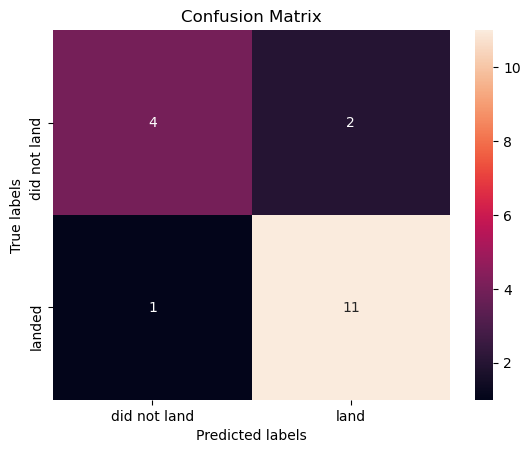

In [24]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, It's clear that *logistic regression* can distinguish between the different classes. The only issue is with false positives.

## TASK 6 - Support Vector Machine (SVM) Model

In [25]:
svm_classifier = SVC()

In [26]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC()

In [27]:
svm_cv = GridSearchCV(estimator=svm_classifier, param_grid=parameters, scoring='accuracy', cv=10)

In [28]:
svm_cv.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [29]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


## TASK  7 - Calculate the Accuracy of SVM Model

In [30]:
mod_accuracy_2 = svm_cv.score(X_train, y_train)
print("The accuracy score is:", mod_accuracy_2.round(3))

The accuracy score is: 0.875


### Confusion Matrix for the SVM Model

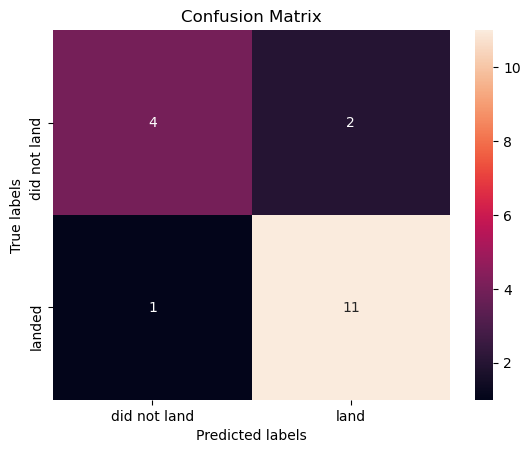

In [31]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK 8 - Decision Tree Model
The purpose of this section is to create a **decision tree classifier** object and then I will create a  **GridSearchCV** object  **tree_cv** with cv = 10.  Following that, I will fit the object to find the best parameters from the dictionary **parameters**.

In [32]:
# Create a DecisionTreeClassifier instance
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [33]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [34]:
tree_cv = GridSearchCV(estimator=tree_classifier, param_grid=parameters, scoring='accuracy', cv=10)

In [35]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

## TASK 9 - Calculate Accuracy of Decision Tree Model

In [36]:
accuracy = tree_cv.score(X_train, y_train)
print("accuracy :",accuracy.round(3))

accuracy : 0.903


### Confusion Matrix for the Decision Tree Model

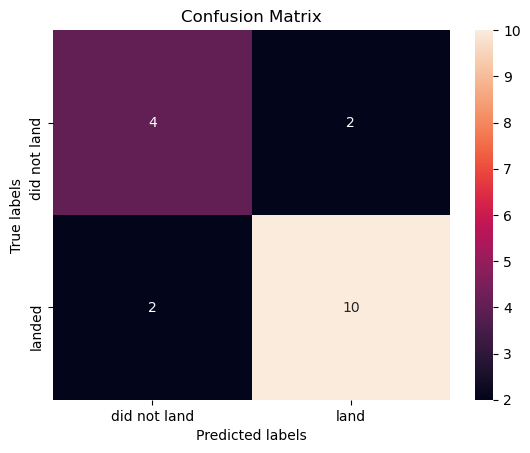

In [37]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK 10 - K Nearest Neighbor (KNN) Model
In this section I will develop a **K Nearest Neighbor** and then create a  **GridSearchCV** object **knn_cv** with cv = 10.  Following that, I will fit the object to find the best parameters from the dictionary **parameters**.

In [38]:
knn = KNeighborsClassifier()

In [39]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [40]:
knn_cv = GridSearchCV(knn, param_grid = parameters, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

In [41]:
knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

## TASK 11 - Calculate Accuracy of KNN Model

In [42]:
best_params = knn_cv.best_params_
accuracy = knn_cv.best_score_

In [43]:
print("tuned hpyerparameters :(best parameters) ",best_params)
print("accuracy :",accuracy.round(3))

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.864


### Confusion Matrix for the KNN Model

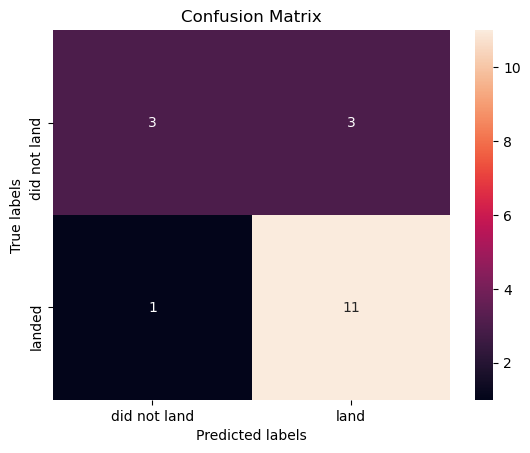

In [44]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  12 - Best Performing Model

In [45]:
print("The Accuracy of the Logiastic Regression Model:", logreg_cv.score(X_train, y_train).round(3))
print("The Accuracy of the SVM Model:", svm_cv.score(X_train, y_train).round(4))
print("The Accuracy of the Decision Tree Model:", tree_cv.score(X_train, y_train).round(4))
print("The Accuracy of the KNN Model:", knn_cv.score(X_train, y_train).round(4))

The Accuracy of the Logiastic Regression Model: 0.958
The Accuracy of the SVM Model: 0.875
The Accuracy of the Decision Tree Model: 0.9028
The Accuracy of the KNN Model: 0.8472


#### Given the above, the best performing model is the Logistic Regression model with the highest accuracy score.

## Thank you for reviewing this project!